In [101]:
import pandas as pd
import numpy as np
import datetime as dt
import glob
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", 20)

cfs_2_cms = 0.0283168466

### Load drying regimes data and non-perennial gages from PNW

In [2]:
dryReg = pd.read_csv("../data/dryingRegimes_data_RF.csv")
pnwNP = pd.read_csv("../data/pnwNP_Info.csv")

### Make columns in "YYYY-MM-DD" format for each drying event

In [4]:
dryReg["dryStart"] = pd.to_datetime(dryReg["calendar_year"], format='%Y')+ pd.to_timedelta(dryReg["dry_date_start"], unit='days')
dryReg["dryEnd"] = dryReg["dryStart"]+ pd.to_timedelta(dryReg["dry_dur"], unit='days')
dryReg["dryPeakDate"] = pd.to_datetime(dryReg["calendar_year"], format='%Y')+ pd.to_timedelta(dryReg["peak_date"], unit='days')

### Subset drying regimes data to PNW gages

In [5]:
pnwNPdry = dryReg[dryReg["gage"].isin(pnwNP['gage'])].reset_index()

### Load, subset to drying events, and save the modeled data

In [6]:
path =r'../data/pnwNP_modeledData/'

for i in tqdm(range(90,110)):
    filename = glob.glob(path + str(pnwNPdry['gage'][i])+"*wNWM2d1.csv")
    
    df = pd.read_csv(filename[0]).drop(["Unnamed: 0","Unnamed: 0.1","gage_x","gage_y"],axis=1)
    df["time"] = pd.to_datetime(df["time"])
    
    df = df[(df['time'] >= pnwNPdry["dryPeakDate"][i])&(df['time'] <= pnwNPdry["dryEnd"][i])]
    df['state'] = 0
    df.loc[(df['time'] >= pnwNPdry["dryPeakDate"][i])&(df['time'] < pnwNPdry["dryStart"][i]),'state'] = "drying"
    df.loc[(df['time'] >= pnwNPdry["dryStart"][i])&(df['time'] <= pnwNPdry["dryEnd"][i]),'state'] = "dry"
    
    
    if os.path.isfile(str(pnwNPdry['gage'][i])+"dryingEvent.csv"):
        df.to_csv("../data/pnwDrying_model/" + str(pnwNPdry['gage'][i])+"dryingEvent.csv", mode='a', index=False, header=None)
    else:
        df.to_csv("../data/pnwDrying_model/" + str(pnwNPdry['gage'][i])+"dryingEvent.csv", index=False)

  0%|          | 0/20 [00:00<?, ?it/s]


IndexError: list index out of range

In [123]:
# i = 20
# df = pd.read_csv('../data/pnwNP_modeledData/'+str(pnwNP['gage'][i])+".csv")

df = pd.read_csv('../data/pnwNP_modeledData/'+"14362250"+".csv")


df["time"] = pd.to_datetime(df["time"])
tmp = pnwNPdry[pnwNPdry["gage"] == pnwNP['gage'][i]].reset_index(drop=True)

In [130]:
tmp

,index,gage,event_id,dec_lat_va,dec_long_va,peak_date,peak_value,peak_quantile,peak2zero,drying_rate,...,P_90,PET_90,Tmax_90,melt_90,P.PET,P.PET90,pred_class,dryStart,dryEnd,dryPeakDate
0,24808,12513000,29824,46.66347,-118.8633,36,113.0,0.996996,6,0.326684,...,103,25,2.123333,NaN,0.0,4.120000,NaN,1980-02-11,1980-02-18,1980-02-06
1,24809,12513000,29825,46.66347,-118.8633,48,616.0,0.999763,7,0.756429,...,88,35,2.416667,NaN,0.0,2.514286,NaN,1980-02-24,1980-05-26,1980-02-18
2,24810,12513000,29827,46.66347,-118.8633,256,5.8,0.787572,5,0.223104,...,39,487,28.431110,NaN,0.0,0.080082,NaN,1980-09-17,1981-05-06,1980-09-13
3,24811,12513000,29828,46.66347,-118.8633,172,0.9,0.515298,4,0.903678,...,61,375,19.788890,NaN,0.0,0.162667,NaN,1981-06-25,1981-07-02,1981-06-22
4,24812,12513000,29829,46.66347,-118.8633,187,0.4,0.486916,4,0.329328,...,59,424,22.314440,NaN,0.0,0.139151,NaN,1981-07-10,1981-07-14,1981-07-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,24866,12513000,29903,46.66347,-118.8633,201,3.7,0.676338,5,0.522121,...,93,466,24.814440,0.0,0.0,0.199571,4.0,2012-07-24,2012-07-25,2012-07-20
59,24867,12513000,29904,46.66347,-118.8633,296,20.5,0.988853,5,0.494217,...,25,382,26.523330,0.0,inf,0.065445,4.0,2012-10-27,2013-03-29,2012-10-23
60,24868,12513000,29905,46.66347,-118.8633,90,3.9,0.686220,4,1.207054,...,67,121,7.502222,7.0,0.0,0.553719,4.0,2014-04-04,2014-04-05,2014-04-01
61,24869,12513000,29907,46.66347,-118.8633,149,3.5,0.667167,4,1.016552,...,53,360,19.130000,2.0,0.0,0.147222,4.0,2014-06-02,2014-06-04,2014-05-30


In [136]:
i = 45
tmp.iloc[i].dryPeakDate,tmp.iloc[i].dryStart, tmp.iloc[i].dryEnd

(Timestamp('2004-10-25 00:00:00'),
 Timestamp('2004-10-28 00:00:00'),
 Timestamp('2005-01-19 00:00:00'))

In [151]:
out = df[(df['time'] >= tmp["dryPeakDate"].iloc[i])&(df['time'] <= tmp["dryEnd"].iloc[i])]
out['state'] = 0
out.loc[(df['time'] >= tmp["dryPeakDate"].iloc[i])&(df['time'] < tmp["dryStart"].iloc[i]),'state'] = 1 ## drying
# df.loc[(df['time'] >= pnwNPdry["dryStart"][i])&(df['time'] <= pnwNPdry["dryEnd"][i]),'state'] = 0 ## dry

<ipython-input-151-6eaee9df4767>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out['state'] = 0
/opt/miniconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [152]:
out[out['time'] == tmp["dryStart"].iloc[i]]

,Unnamed: 0,streamflow_VIC,time,streamflow_PRMS,streamflow_NWM2d0,streamflow_NWM2d1,streamflow_NWIS,gage,state
20024,20024,0.339637,2004-10-28,1.082024,0.0,0.08,0.030016,14362250,0


In [153]:
out

,Unnamed: 0,streamflow_VIC,time,streamflow_PRMS,streamflow_NWM2d0,streamflow_NWM2d1,streamflow_NWIS,gage,state
20021,20021,0.893167,2004-10-25,1.474587,0.000000,0.089167,0.022087,14362250,1
20022,20022,1.155734,2004-10-26,1.972323,0.000000,0.080000,0.072491,14362250,1
20023,20023,0.707217,2004-10-27,1.591152,0.000000,0.080000,0.047855,14362250,1
20024,20024,0.339637,2004-10-28,1.082024,0.000000,0.080000,0.030016,14362250,0
20025,20025,0.211120,2004-10-29,0.813710,0.000000,0.080000,0.025485,14362250,0
...,...,...,...,...,...,...,...,...,...
20103,20103,0.518048,2005-01-15,0.402338,0.185417,0.070000,0.128842,14362250,0
20104,20104,0.723734,2005-01-16,0.461187,0.190417,0.070000,0.236729,14362250,0
20105,20105,0.790421,2005-01-17,0.675670,0.198750,0.070000,0.586159,14362250,0
20106,20106,0.734247,2005-01-18,0.697198,0.210000,0.070000,1.141169,14362250,0


[(0.0, 10.0)]

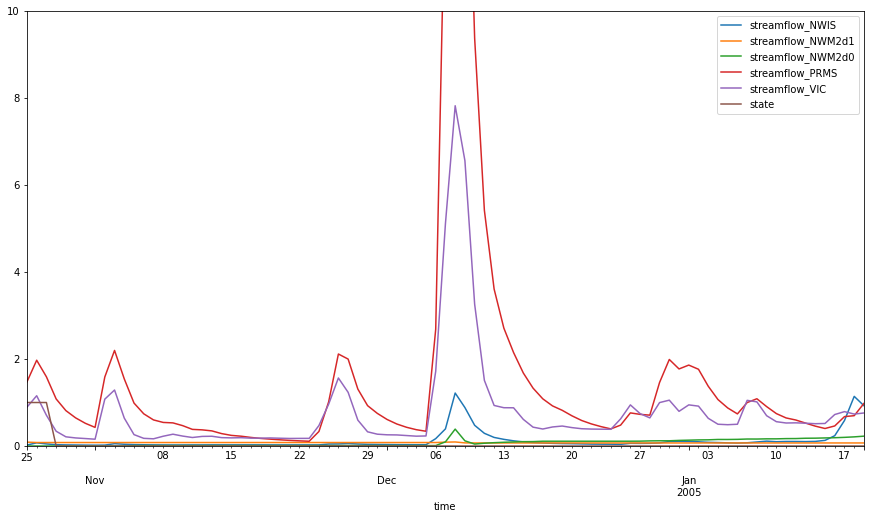

In [161]:
ax = out.plot(x = "time", 
         y = ["streamflow_NWIS","streamflow_NWM2d1","streamflow_NWM2d0","streamflow_PRMS","streamflow_VIC","state"],
        figsize=(15,8))
ax.set(ylim = (0,10))

In [122]:
out

,Unnamed: 0,streamflow_VIC,time,streamflow_PRMS,streamflow_NWM2d0,streamflow_NWM2d1,streamflow_NWIS,gage,state
16010,16010,1.059232,1993-11-01,4.919973,3.01,3.986250,0.053802,13217500,1
16011,16011,1.051060,1993-11-02,4.896936,3.01,3.972083,0.050970,13217500,1
16012,16012,1.044363,1993-11-03,4.875153,3.01,3.955833,0.050970,13217500,1
16013,16013,1.040024,1993-11-04,4.855131,3.01,3.942083,0.048139,13217500,1
16014,16014,1.036458,1993-11-05,4.836101,3.01,3.926250,0.045307,13217500,1
...,...,...,...,...,...,...,...,...,...
16036,16036,0.966969,1993-11-27,4.522969,3.01,3.624167,0.000283,13217500,0
16037,16037,0.964124,1993-11-28,4.507831,3.01,3.612083,0.000283,13217500,0
16038,16038,0.961499,1993-11-29,4.493009,3.01,3.598333,0.000283,13217500,0
16039,16039,0.969701,1993-11-30,4.480648,3.01,3.586250,0.001416,13217500,0


<ipython-input-162-0b8b12e99562>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tt = out[(df['time'] >= "2004-09-25")&(df['time'] <= "2005-02-01")]


<AxesSubplot:xlabel='time'>

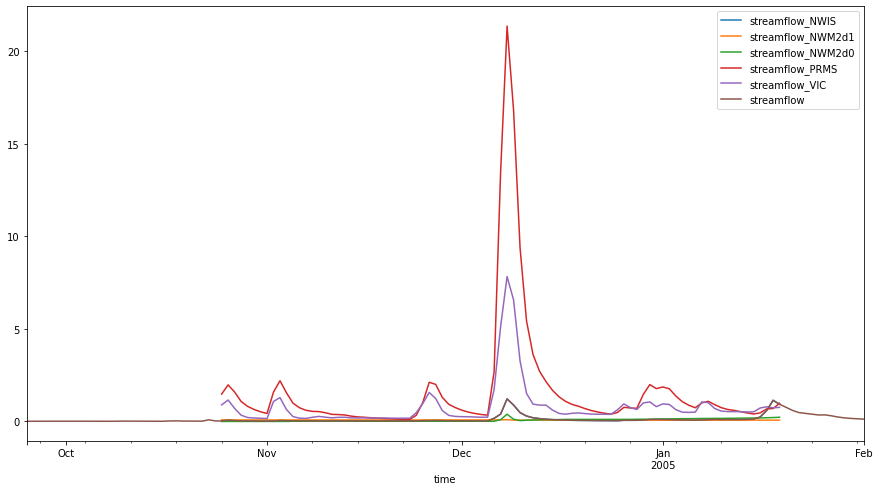

In [162]:
tt = out[(df['time'] >= "2004-09-25")&(df['time'] <= "2005-02-01")]
ax = tt.plot(x = "time", 
         y = ["streamflow_NWIS","streamflow_NWM2d1","streamflow_NWM2d0","streamflow_PRMS","streamflow_VIC"],
        figsize=(15,8))

ttt.plot(ax=ax,
       x = "time",
       y = "streamflow")

In [156]:
ttt = pd.read_csv("../data/NWIS_streamflow/14362250.csv")

In [157]:
ttt["time"] = pd.to_datetime(ttt["Date"])
ttt["streamflow"] = ttt["X_00060_00003"]*cfs_2_cms
ttt = ttt[(ttt['time'] >= "2004-09-25")&(ttt['time'] <= "2005-02-01")]

In [158]:
ttt

,Unnamed: 0,Date,X.1,X,X_00060_00003,P_mm,tmax_C,tmin_C,Q_mm,14362250,time,streamflow
9399,9400,2004-09-25,7758,7758,0.31,0.00,25.348678,9.984456,0.018302,4.059239,2004-09-25,0.008778
9400,9401,2004-09-26,7759,7759,0.29,0.00,23.954195,9.153178,0.017121,3.707833,2004-09-26,0.008212
9401,9402,2004-09-27,7760,7760,0.33,0.00,27.223383,10.939633,0.019483,4.071539,2004-09-27,0.009345
9402,9403,2004-09-28,7761,7761,0.41,0.00,26.164053,11.231293,0.024206,4.123711,2004-09-28,0.011610
9403,9404,2004-09-29,7762,7762,0.44,0.00,21.622405,9.240278,0.025977,3.738167,2004-09-29,0.012459
...,...,...,...,...,...,...,...,...,...,...,...,...
9524,9525,2005-01-28,7883,7883,8.39,0.18,7.233453,1.109331,0.495338,1.788146,2005-01-28,0.237578
9525,9526,2005-01-29,7884,7884,6.78,2.15,8.205874,-0.578677,0.400285,1.149061,2005-01-29,0.191988
9526,9527,2005-01-30,7885,7885,5.74,0.20,11.875529,-0.121227,0.338885,1.712506,2005-01-30,0.162539
9527,9528,2005-01-31,7886,7886,5.03,0.00,11.875467,1.440285,0.296967,1.593765,2005-01-31,0.142434
